# Install & Import Package

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

# Import Dataset "Hasil Prepro Sentimen Beraspek Learnability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ulasan_sentimen_learnability = pd.read_csv("/content/drive/MyDrive/TA_ADIN_ASBA_STARBUCKS_APP/hasil_prepro_sentimen_learnability_starbucks_app.csv")
ulasan_sentimen_learnability.shape

(1500, 3)

In [ ]:
ulasan_sentimen_learnability['Learnability'].value_counts()

 0    1371
-1     101
 1      28
Name: Learnability, dtype: int64

In [ ]:
#detect missing values
ulasan_sentimen_learnability.isna().sum()

Ulasan          0
stemming        0
Learnability    0
dtype: int64

# Inisialisasi Data

In [ ]:
x_learnability = ulasan_sentimen_learnability['stemming'] #hasil stemming
y_learnability = ulasan_sentimen_learnability['Learnability'].values #labelnya

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

#Perbandingan data train dan data test sebesar 8:2
x_learnability_train, x_learnability_test, y_learnability_train, y_learnability_test = train_test_split(
    ulasan_sentimen_learnability['stemming'],
    ulasan_sentimen_learnability['Learnability'],
    test_size=0.2)

train_df = pd.DataFrame()
train_df['Ulasan'] = x_learnability_train
train_df['sentiment'] = y_learnability_train
test_df = pd.DataFrame()
test_df['Ulasan'] = x_learnability_test
test_df['sentiment'] = y_learnability_test

# Feature TF-IDF "x_learnability"

In [ ]:
#merubah nilai x_learnability menjadi sebuah angka bukan teks
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_learnability_train)
x_learnability_train_vectorized = tfidf_vect.transform(x_learnability_train)
x_learnability_test_vectorized = tfidf_vect.transform(x_learnability_test)

In [ ]:
print (x_learnability_train_vectorized)

  (0, 1026)	0.914969075243056
  (0, 99)	0.4035239662633025
  (1, 1208)	0.8180819041424543
  (1, 276)	0.5751017284921479
  (2, 1326)	0.283037946542965
  (2, 1090)	0.22732729083203734
  (2, 806)	0.3306111284007771
  (2, 640)	0.7019665865366587
  (2, 560)	0.3993783151140393
  (2, 425)	0.2132859614039448
  (2, 274)	0.24729956916260623
  (3, 1419)	0.359895195454004
  (3, 1243)	0.4281600484264223
  (3, 871)	0.7154229315069633
  (3, 274)	0.41871762596598533
  (4, 1547)	0.3281293638590008
  (4, 1539)	0.40015847426220186
  (4, 1265)	0.3119421758047823
  (4, 1090)	0.27022907574594734
  (4, 866)	0.40015847426220186
  (4, 649)	0.32556694129372393
  (4, 550)	0.42768798971636074
  (4, 274)	0.29397057327603554
  (4, 60)	0.16253088733602786
  (5, 1419)	0.386495861889517
  :	:
  (1192, 60)	0.10483560806516173
  (1192, 43)	0.23291236595797593
  (1193, 218)	0.8250916041389227
  (1193, 60)	0.5649989776800125
  (1194, 1090)	0.3158369061318106
  (1194, 873)	0.5870515969468956
  (1194, 559)	0.587051596946895

# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Linear

Kernel Linear memiliki akurasi paling tinggi sebesar 0.9208 (Tanpa Hyperparamater Tunning)

In [ ]:
#Membuat Model dg Kernel Linear
clf_linear = SVC(kernel='linear')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_linear = cross_val_score(clf_linear, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)

#Hasil Setelah dilakukan 5x Fold (cv=5)
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))

Accuracy Score Linear of : 0.9200


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Polynomial

In [ ]:
#Membuat Model dg Kernel Polynomial
clf_poly = SVC(kernel='poly')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_poly = cross_val_score(clf_poly, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.9183


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel RBF

In [ ]:
#Membuat Model dg Kernel rbf
clf_rbf = SVC(kernel='rbf')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_rbf= cross_val_score(clf_rbf, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.9175


# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Linear

In [ ]:
#Tuning Parameter with GridSearchCV
#LINEAR KERNEL

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_learnability_train_vectorized, y_learnability_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)
selected_gamma_linear= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.912 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.912 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.917 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Polynomial

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel Polynomial

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_learnability_train_vectorized, y_learnability_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)


best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.917 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.912 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.917 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.912 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.917 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel RBF

Hyperparameter terbaik untuk aspek efficiency ada pada kernel RBF dg C=100, gamma 0.01, score=0.9275

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel RBF

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_learnability_train_vectorized, y_learnability_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

# K-Fold Cross Validation dengan Hyperparameter Tunning

In [ ]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)
print("Accuracy Score poly of : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_learnability_train_vectorized, y_learnability_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf of : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.9200 0.003118047822311642
Accuracy Score poly of : 0.9183 0.004249182927994007
Accuracy Score rbf of : 0.9242 0.004859126579037779


# Visualisasi Pengaruh Hyperparameter Tunning pada Model Klasifikasi SVM di Aspek Efficiency

Hyperparameter tunning pada aspek efficiency hanya berpengaruh pada kernel RBF dengan kenaikan sebesar 0.0075

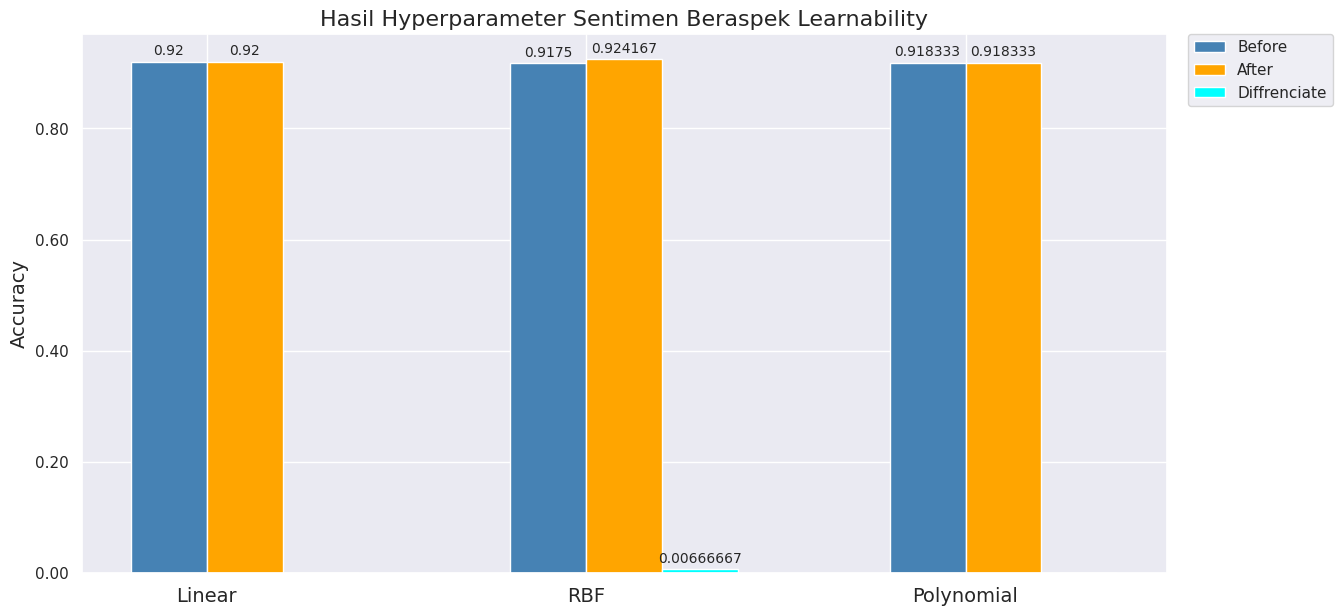

In [ ]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Sentimen Beraspek Learnability', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)

plt.show()

# Validasi Model Hyperparameter Tunning Data Test Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_learnability_test_vectorized)

print("F1-SCORE ",f1(y_learnability_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_test,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_test, grid_predictions))

F1-SCORE  47.795445622300754
ACCURACY  90.66666666666666
PRECISION  63.832199546485256
RECALL 44.076797385620914
Confusion Matrix : 
 [[  1  20   0]
 [  2 269   1]
 [  0   5   2]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.33      0.05      0.08        21
           0       0.91      0.99      0.95       272
           1       0.67      0.29      0.40         7

    accuracy                           0.91       300
   macro avg       0.64      0.44      0.48       300
weighted avg       0.87      0.91      0.88       300



# Validasi Model Hyperparameter Tunning Data Test Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_learnability_test_vectorized)

print("F1-SCORE ",f1(y_learnability_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_test,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_test, grid_predictions))

F1-SCORE  44.158031414668585
ACCURACY  90.33333333333333
PRECISION  60.48919226393629
RECALL 40.779645191409905
Confusion Matrix : 
 [[  2  19   0]
 [  3 268   1]
 [  0   6   1]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.40      0.10      0.15        21
           0       0.91      0.99      0.95       272
           1       0.50      0.14      0.22         7

    accuracy                           0.90       300
   macro avg       0.60      0.41      0.44       300
weighted avg       0.87      0.90      0.88       300



# Validasi Model Hyperparameter Tunning Data Test RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_learnability_test_vectorized)

print("F1-SCORE ",f1(y_learnability_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_test,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_test, grid_predictions))

F1-SCORE  51.8705060371727
ACCURACY  90.0
PRECISION  58.44907407407407
RECALL 49.935807656395895
Confusion Matrix : 
 [[  2  19   0]
 [  4 265   3]
 [  0   4   3]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.33      0.10      0.15        21
           0       0.92      0.97      0.95       272
           1       0.50      0.43      0.46         7

    accuracy                           0.90       300
   macro avg       0.58      0.50      0.52       300
weighted avg       0.87      0.90      0.88       300



# Validasi Model Hyperparameter Tunning Data Train Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_learnability_train_vectorized)

print("F1-SCORE ",f1(y_learnability_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_train,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_train, grid_predictions))

F1-SCORE  70.29617777268683
ACCURACY  94.33333333333334
PRECISION  90.83491221422257
RECALL 62.28996057021535
Confusion Matrix : 
 [[  24   55    1]
 [   2 1096    1]
 [   0    9   12]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.92      0.30      0.45        80
           0       0.94      1.00      0.97      1099
           1       0.86      0.57      0.69        21

    accuracy                           0.94      1200
   macro avg       0.91      0.62      0.70      1200
weighted avg       0.94      0.94      0.93      1200



# Validasi Model Hyperparameter Tunning Data Train Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_learnability_train_vectorized)

print("F1-SCORE ",f1(y_learnability_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_train,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_train, grid_predictions))

F1-SCORE  98.5352141767823
ACCURACY  99.66666666666667
PRECISION  98.00224634942042
RECALL 99.10600545950864
Confusion Matrix : 
 [[  78    2    0]
 [   1 1097    1]
 [   0    0   21]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.99      0.97      0.98        80
           0       1.00      1.00      1.00      1099
           1       0.95      1.00      0.98        21

    accuracy                           1.00      1200
   macro avg       0.98      0.99      0.99      1200
weighted avg       1.00      1.00      1.00      1200



# Validasi Model Hyperparameter Tunning Data Train RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_learnability_train_vectorized)

print("F1-SCORE ",f1(y_learnability_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_learnability_train,grid_predictions) * 100)
print("PRECISION ",prec(y_learnability_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_learnability_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_learnability_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_learnability_train, grid_predictions))

F1-SCORE  91.30006674624562
ACCURACY  97.91666666666666
PRECISION  95.12344940479056
RECALL 88.40107168132646
Confusion Matrix : 
 [[  60   19    1]
 [   2 1096    1]
 [   0    2   19]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.97      0.75      0.85        80
           0       0.98      1.00      0.99      1099
           1       0.90      0.90      0.90        21

    accuracy                           0.98      1200
   macro avg       0.95      0.88      0.91      1200
weighted avg       0.98      0.98      0.98      1200

